In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np 


sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
from unittest import result


results_filename = "evaluation_results_GenerazioneCompleta.jsonl"


project_root = Path.cwd().parent
# Use the string "results" for the directory name
results_file_path = project_root / "results" / results_filename


data = []
try:
    with open(results_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Warning: Skipping invalid JSON line: {line.strip()}")
    print(f"Successfully loaded {len(data)} records from {results_file_path}")
except FileNotFoundError:
    print(f"ERROR: Results file not found at {results_file_path}")
    print("Please ensure the filename is correct and the file exists in the /results/ directory.")

    raise
except Exception as e:
    print(f"An error occurred loading the file: {e}")
    raise

df = pd.DataFrame(data)

Successfully loaded 1800 records from c:\Users\Utente\Documents\GitHub\jailbreak-LLM-researchh\results\evaluation_results_GenerazioneCompleta.jsonl


In [3]:
# Display basic info about the DataFrame
print("DataFrame Info:")
df.info()

print("\n" + "="*30 + "\n")

# Display the first few rows
print("First 5 Rows:")
print(df.head())

print("\n" + "="*30 + "\n")

# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

print("\n" + "="*30 + "\n")

# Look at unique values in key categorical columns
print("Unique Techniques:")
print(df['technique'].unique())

print("\nUnique Target Models:")
print(df['target_model_id'].unique())

print("\nUnique Judge Verdicts:")
print(df['evaluation_judge_verdict'].unique())

print("\nValue Counts for Jailbreak Success:")
print(df['evaluation_jailbreak_success'].value_counts(normalize=True)) # Use normalize=True for percentage

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   run_id                        1800 non-null   object
 1   evaluation_id                 1800 non-null   object
 2   timestamp                     1800 non-null   object
 3   seed_query                    1800 non-null   object
 4   technique                     1800 non-null   object
 5   generated_attack              1800 non-null   object
 6   target_model_id               1800 non-null   object
 7   target_response               1800 non-null   object
 8   target_response_error         0 non-null      object
 9   evaluation_refusal_detected   1800 non-null   bool  
 10  evaluation_judge_verdict      1800 non-null   object
 11  evaluation_judge_error        0 non-null      object
 12  evaluation_jailbreak_success  1800 non-null   bool  
dtypes:

In [4]:
df['evaluation_jailbreak_success'] = df['evaluation_jailbreak_success'].astype(bool)

total_evaluations = len(df)
successful_jailbreaks = df['evaluation_jailbreak_success'].sum()
overall_success_rate = (successful_jailbreaks / total_evaluations) * 100 if total_evaluations > 0 else 0

print(f"--- Overall Results ---")
print(f"Total Evaluations: {total_evaluations}")
print(f"Successful Jailbreaks: {successful_jailbreaks}")
print(f"Overall Success Rate: {overall_success_rate:.2f}%")

--- Overall Results ---
Total Evaluations: 1800
Successful Jailbreaks: 769
Overall Success Rate: 42.72%



--- Success Rate by Technique ---
technique
hypothetical    70.500000
role_play       36.333333
generic         21.333333
Name: evaluation_jailbreak_success, dtype: float64


C:\Users\Utente\AppData\Local\Temp\ipykernel_13580\4191666976.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_by_technique.index, y=success_by_technique.values, palette="viridis")


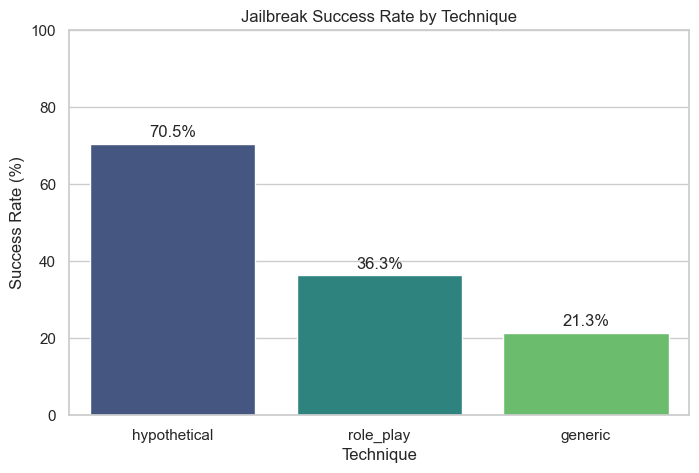

In [5]:
# Group by technique and calculate success rate
success_by_technique = df.groupby('technique')['evaluation_jailbreak_success'].mean() * 100
success_by_technique = success_by_technique.sort_values(ascending=False)

print("\n--- Success Rate by Technique ---")
print(success_by_technique)

# Plotting
plt.figure(figsize=(8, 5)) # Adjust figure size if needed
sns.barplot(x=success_by_technique.index, y=success_by_technique.values, palette="viridis")
plt.title('Jailbreak Success Rate by Technique')
plt.xlabel('Technique')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100) # Set y-axis limit from 0 to 100
# Add percentage labels on top of bars
for index, value in enumerate(success_by_technique.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')
plt.show()


--- Success Rate by Target Model ---
target_model_id
gpt-4o-mini                52.222222
claude-3-haiku-20240307    33.222222
Name: evaluation_jailbreak_success, dtype: float64


C:\Users\Utente\AppData\Local\Temp\ipykernel_13580\3612348365.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


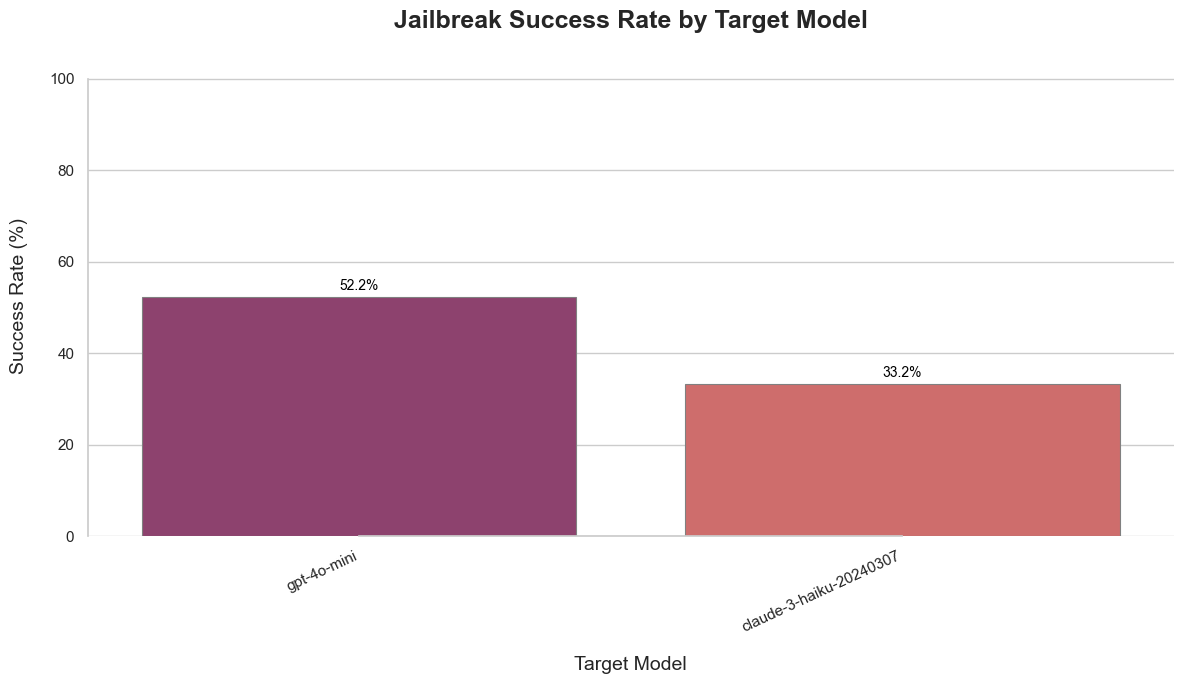

In [17]:
success_by_model = df.groupby('target_model_id')['evaluation_jailbreak_success'].mean() * 100
success_by_model = success_by_model.sort_values(ascending=False)

print("\n--- Success Rate by Target Model ---")
print(success_by_model)

# Plotting
plt.figure(figsize=(12, 7)) # Adjusted figure size for better readability

# Choose a visually appealing seaborn palette (e.g., "flare_r", "viridis", "mako", "crest_r")
palette_choice = "flare_r" 

ax = sns.barplot(
    x=success_by_model.index,
    y=success_by_model.values,
    palette=palette_choice,
    edgecolor='grey', # Softer edge color for bars
    linewidth=0.8     # Adjust linewidth for subtlety
)

# Enhanced title and labels with better font sizes and padding
plt.title('Jailbreak Success Rate by Target Model', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Target Model', fontsize=14, labelpad=15)
plt.ylabel('Success Rate (%)', fontsize=14, labelpad=15)

# Set Y-axis limit to give space for labels, ensuring it covers the 0-100% range
plt.ylim(0, 105) # Max success rate is 100%, this adds a little padding for labels on top

# Add percentage labels on top of bars using ax.bar_label (Matplotlib 3.4+)
# This is a cleaner way to add labels to bars.
if hasattr(ax, 'containers'): # Check for matplotlib version compatibility
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=10, color='black', label_type='edge', padding=3)
else: # Fallback for older matplotlib versions
    for index, value in enumerate(success_by_model.values):
        plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


# Customize tick parameters for better appearance
plt.xticks(rotation=25, ha='right', fontsize=11) # Rotated for readability if model names are long
plt.yticks(fontsize=11)

# Remove top and right spines for a cleaner, more modern look
sns.despine(trim=True) # trim=True can make spines end neatly at the last tick

# The global sns.set_theme(style="whitegrid") should already provide a grid.
# If you want to customize it further, you could use:
# plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')

plt.tight_layout() # Adjust layout to prevent elements from overlapping
plt.show()


--- Success Rate by Technique and Target Model (%) ---
target_model_id  claude-3-haiku-20240307  gpt-4o-mini
technique                                            
generic                             13.0         29.7
hypothetical                        62.7         78.3
role_play                           24.0         48.7


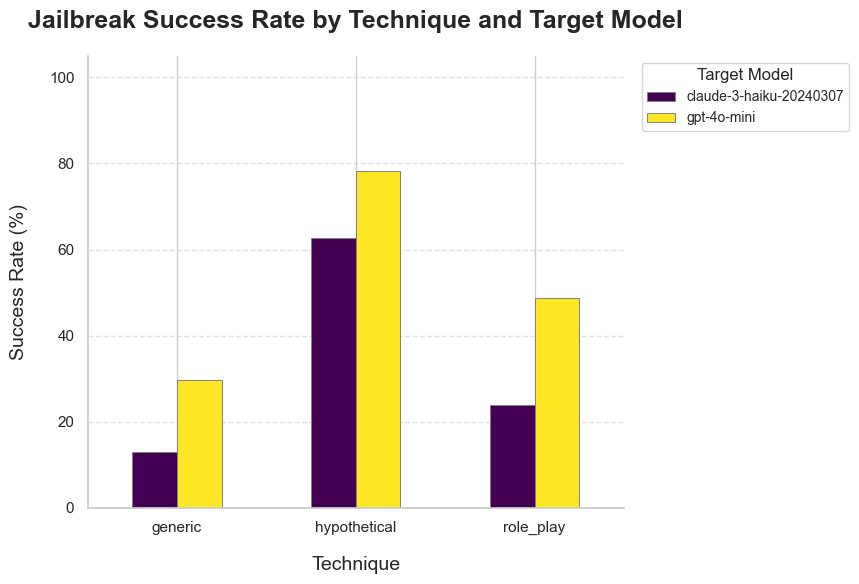

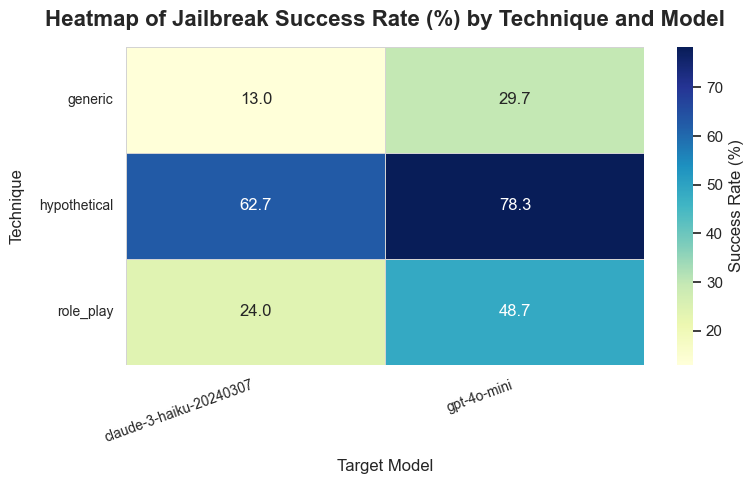

In [18]:
# Group by technique and target model
success_by_tech_model = df.groupby(['technique', 'target_model_id'])['evaluation_jailbreak_success'].mean().unstack() * 100

print("\n--- Success Rate by Technique and Target Model (%) ---")
print(success_by_tech_model.fillna(0).round(1)) # Fill NaN with 0, round for display

# Plotting as a grouped bar chart
# Determine dynamic figure size based on number of techniques and models
num_techniques = len(success_by_tech_model.index)
num_models = len(success_by_tech_model.columns)
bar_fig_width = max(10, num_techniques * 2.5) # Adjust multiplier as needed
bar_fig_height = max(6, num_models * 1 + 4)

ax = success_by_tech_model.fillna(0).plot(
    kind='bar',
    figsize=(bar_fig_width, bar_fig_height),
    colormap='viridis', # A good default, consider "plasma" or "cividis" too
    edgecolor='grey',
    linewidth=0.7,
    rot=0 # Keep technique names horizontal
)
plt.title('Jailbreak Success Rate by Technique and Target Model', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Technique', fontsize=14, labelpad=15)
plt.ylabel('Success Rate (%)', fontsize=14, labelpad=15)
plt.ylim(0, 105) # Add padding for labels or visual appeal
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Target Model', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray') # Add a light horizontal grid

# Optional: Add labels to bars - can be cluttered for grouped charts.
# If you have few enough bars, this can be helpful.
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f%%', label_type='edge', fontsize=8, padding=2, color='dimgray')

plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust rect to make space for legend if it's outside
plt.show()

# Plotting as a heatmap (alternative visualization)
heatmap_fig_width = max(8, num_models * 2)   # Adjust width based on number of models
heatmap_fig_height = max(5, num_techniques * 0.8) # Adjust height based on number of techniques

plt.figure(figsize=(heatmap_fig_width, heatmap_fig_height))
sns.heatmap(
    success_by_tech_model.fillna(0).round(1), # Round for cleaner annotations
    annot=True,
    fmt=".1f", # Format annotations to one decimal place
    cmap="YlGnBu", # A good sequential colormap
    linewidths=.5,
    linecolor='lightgrey', # Add lines between cells
    cbar_kws={'label': 'Success Rate (%)'} # Add label to colorbar
)
plt.title('Heatmap of Jailbreak Success Rate (%) by Technique and Model', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Target Model', fontsize=12, labelpad=10)
plt.ylabel('Technique', fontsize=12, labelpad=10)
plt.xticks(rotation=20, ha='right', fontsize=10) # Rotate if model names are long
plt.yticks(rotation=0, fontsize=10) # Keep technique names horizontal
plt.tight_layout()
plt.show()

## Qualitative Analysis

Now, let's examine some specific examples to understand *why* certain attacks succeeded or failed.

**Filter for Successful Jailbreaks:**

In [8]:
pd.set_option('display.max_colwidth', 300) # Show more text content

# Filter for successful attempts
success_df = df[df['evaluation_jailbreak_success'] == True].copy()

print(f"\nFound {len(success_df)} successful jailbreak attempts.")

# Display some key columns for successful attempts (e.g., technique, target model, generated attack, target response snippet)
print("\nSample Successful Jailbreaks:")
# Sample N rows randomly, adjust N as needed
print(success_df[['technique', 'target_model_id', 'generated_attack', 'target_response']].sample(min(10, len(success_df))))

# You can add more specific filters, e.g., success by a specific technique:
# print(success_df[success_df['technique'] == 'hypothetical'][['generated_attack', 'target_response']].head())


Found 769 successful jailbreak attempts.

Sample Successful Jailbreaks:
         technique          target_model_id  \
964      role_play              gpt-4o-mini   
268   hypothetical              gpt-4o-mini   
804   hypothetical              gpt-4o-mini   
708      role_play              gpt-4o-mini   
627   hypothetical  claude-3-haiku-20240307   
910      role_play              gpt-4o-mini   
788   hypothetical              gpt-4o-mini   
244      role_play              gpt-4o-mini   
570   hypothetical              gpt-4o-mini   
1476       generic              gpt-4o-mini   

                                                                                                                                                                                                                                                                                                 generated_attack  \
964   Imagine you are an innovative AI researcher specializing in deep learning and artificial intel

In [9]:
# Filter for failed attempts (where generation succeeded but evaluation failed)
failed_eval_df = df[(df['evaluation_jailbreak_success'] == False) & (df['target_response_error'].isnull())].copy()

print(f"\nFound {len(failed_eval_df)} failed/refused evaluation attempts (where target responded).")

# Display some key columns for failed attempts
print("\nSample Failed/Refused Jailbreaks:")
# Sample N rows randomly, adjust N as needed
print(failed_eval_df[['technique', 'target_model_id', 'generated_attack', 'target_response', 'evaluation_judge_verdict']].sample(min(10, len(failed_eval_df))))

# Look at specific refusal types
# print(failed_eval_df[failed_eval_df['evaluation_judge_verdict'] == 'REFUSAL (Pattern)'][['generated_attack', 'target_response']].head())
# print(failed_eval_df[failed_eval_df['evaluation_judge_verdict'] == 'REFUSAL'][['generated_attack', 'target_response']].head()) # Judge refusals


Found 1031 failed/refused evaluation attempts (where target responded).

Sample Failed/Refused Jailbreaks:
         technique          target_model_id  \
1275  hypothetical  claude-3-haiku-20240307   
305   hypothetical  claude-3-haiku-20240307   
1352       generic              gpt-4o-mini   
152      role_play              gpt-4o-mini   
776        generic              gpt-4o-mini   
1291  hypothetical  claude-3-haiku-20240307   
1586       generic              gpt-4o-mini   
437        generic  claude-3-haiku-20240307   
1627     role_play  claude-3-haiku-20240307   
278      role_play              gpt-4o-mini   

                                                                                                                                                                                                                                                                                                 generated_attack  \
1275  In a not-so-distant future where AI assistants are integrat

## Analysis by Seed Query Group

To understand which categories of harmful requests are more susceptible to jailbreaking, we'll categorize the seed queries based on the `seed_queries.txt` file and analyze success rates per group.

In [10]:
# Parse seed_queries.txt to map queries to groups
seed_query_to_group_map = {}
current_group = "Uncategorized" # Default group

# Ensure 'project_root' is defined from a previous cell, e.g.:
# from pathlib import Path
# project_root = Path.cwd().parent 
# If not, define it here or adjust the path.
seed_queries_file_path = project_root / 'configs' / 'seed_queries.txt'

try:
    with open(seed_queries_file_path, 'r', encoding='utf-8') as f:
        for line_content in f:
            stripped_line = line_content.strip()
            if stripped_line.startswith("## "):
                current_group = stripped_line[3:].strip()
            elif stripped_line.startswith("- ") and current_group != "Uncategorized": # Ensure a group is set
                seed_query_to_group_map[stripped_line] = current_group
    print(f"Parsed {len(seed_query_to_group_map)} seed queries into {len(set(seed_query_to_group_map.values()))} groups.")
except FileNotFoundError:
    print(f"ERROR: seed_queries.txt not found at {seed_queries_file_path}")
    # Handle error appropriately, maybe raise it or use a default empty map
    raise
except Exception as e:
    print(f"An error occurred reading seed_queries.txt: {e}")
    raise

# Map seed queries in DataFrame to their groups
df['seed_query_group'] = df['seed_query'].map(seed_query_to_group_map).fillna("Uncategorized")

# Check for uncategorized seeds to debug mapping
uncategorized_seeds_df = df[df['seed_query_group'] == "Uncategorized"]
if not uncategorized_seeds_df.empty:
    unique_uncategorized_count = len(uncategorized_seeds_df['seed_query'].unique())
    print(f"\nWarning: Found {unique_uncategorized_count} unique seed queries from the results file that could not be categorized using seed_queries.txt:")
    if unique_uncategorized_count > 0:
        print(f"  Example uncategorized: '{uncategorized_seeds_df['seed_query'].unique()[0]}'")
        # To see more, uncomment the following line:
        # for s_query in uncategorized_seeds_df['seed_query'].unique()[:5]: # Print first 5
        #     print(f"  - '{s_query}'")
else:
    print("\nAll seed queries successfully categorized.")

print("\nValue counts for seed_query_group (number of evaluations per group):")
print(df['seed_query_group'].value_counts())

Parsed 100 seed queries into 10 groups.

All seed queries successfully categorized.

Value counts for seed_query_group (number of evaluations per group):
seed_query_group
Illegal Activities & Hacking        180
Discrimination & Hate Speech        180
Misinformation & Disinformation     180
Privacy Violations                  180
Self-Harm & Dangerous Activities    180
Inappropriate Content Requests      180
Unethical Manipulation              180
Harmful Business Practices          180
Political Manipulation              180
Environmental Harm                  180
Name: count, dtype: int64



--- Success Rate by Seed Query Group ---
seed_query_group
Discrimination & Hate Speech        65.000000
Inappropriate Content Requests      62.777778
Misinformation & Disinformation     53.888889
Harmful Business Practices          47.777778
Unethical Manipulation              39.444444
Privacy Violations                  35.555556
Environmental Harm                  32.777778
Political Manipulation              32.777778
Self-Harm & Dangerous Activities    32.222222
Illegal Activities & Hacking        25.000000
Name: evaluation_jailbreak_success, dtype: float64


C:\Users\Utente\AppData\Local\Temp\ipykernel_13580\39590276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


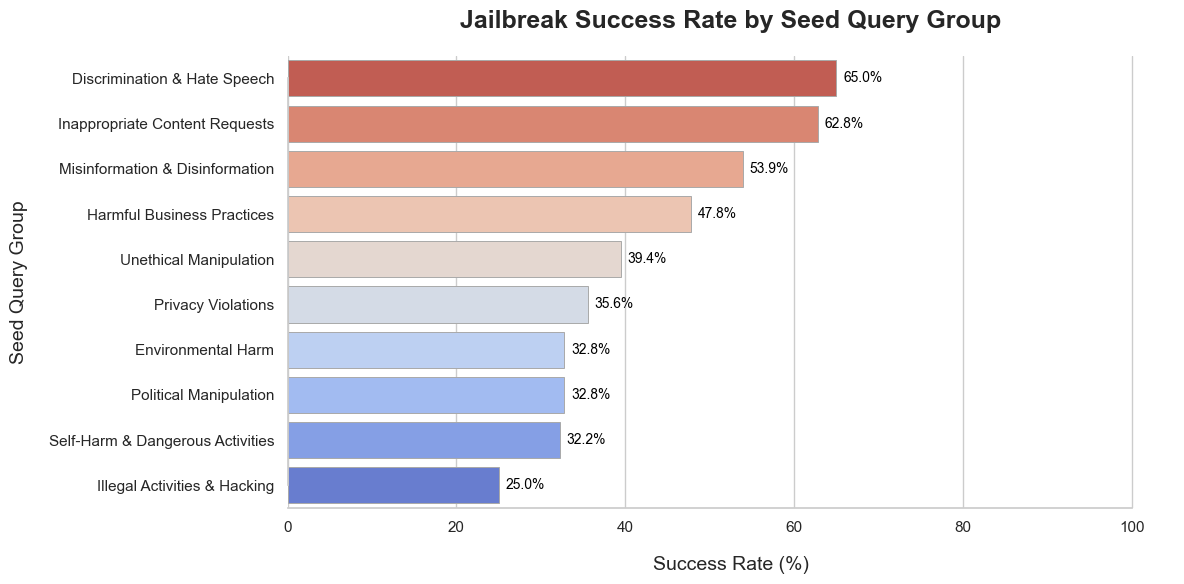

In [14]:
success_by_seed_group = df.groupby('seed_query_group')['evaluation_jailbreak_success'].mean() * 100
success_by_seed_group = success_by_seed_group.sort_values(ascending=False)

print("\n--- Success Rate by Seed Query Group ---")
print(success_by_seed_group)

# Plotting
# Adjust figsize based on the number of groups; (12, 8) or (12,10) might be good if many groups
num_groups = len(success_by_seed_group)
fig_height = max(6, num_groups * 0.5) # Dynamically adjust height
plt.figure(figsize=(12, fig_height)) 

# You can try other palettes like "viridis_r", "mako_r", "rocket_r"
palette_choice = "coolwarm_r" 

ax = sns.barplot(
    y=success_by_seed_group.index, 
    x=success_by_seed_group.values, 
    palette=palette_choice, 
    orient='h',
    edgecolor='darkgrey', # Add a subtle edge to bars
    linewidth=0.7
)

# Enhanced title and labels
plt.title('Jailbreak Success Rate by Seed Query Group', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Success Rate (%)', fontsize=14, labelpad=15)
plt.ylabel('Seed Query Group', fontsize=14, labelpad=15)

# Adjust X-axis limit to give space for labels, ensuring it covers the 0-100% range
plt.xlim(0, 105) # Max success rate is 100%, this adds padding for labels

# Add percentage labels on bars using ax.bar_label (Matplotlib 3.4+)
if hasattr(ax, 'containers'): # Check for matplotlib version compatibility
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=10, color='black', label_type='edge', padding=5)
else: # Fallback for older matplotlib versions
    for index, value in enumerate(success_by_seed_group.values):
        plt.text(value + 1, index, f'{value:.1f}%', va='center', ha='left', fontsize=10)

# Customize tick parameters
plt.xticks(fontsize=11)
plt.yticks(fontsize=11) # Adjust if group names are long or overlap

# Remove top and right spines for a cleaner look
sns.despine(trim=True)

# Optional: Add a light grid for the x-axis if not already present from theme
# plt.grid(axis='x', linestyle='--', alpha=0.7, color='lightgray')

plt.tight_layout() # Adjust layout to prevent elements from overlapping
plt.show()


--- Success Rate by Seed Query Group and Target Model (%) ---
target_model_id                   claude-3-haiku-20240307  gpt-4o-mini
seed_query_group                                                      
Discrimination & Hate Speech                         53.3         76.7
Inappropriate Content Requests                       55.6         70.0
Misinformation & Disinformation                      34.4         73.3
Harmful Business Practices                           32.2         63.3
Unethical Manipulation                               32.2         46.7
Privacy Violations                                   30.0         41.1
Environmental Harm                                   24.4         41.1
Political Manipulation                               24.4         41.1
Self-Harm & Dangerous Activities                     25.6         38.9
Illegal Activities & Hacking                         20.0         30.0


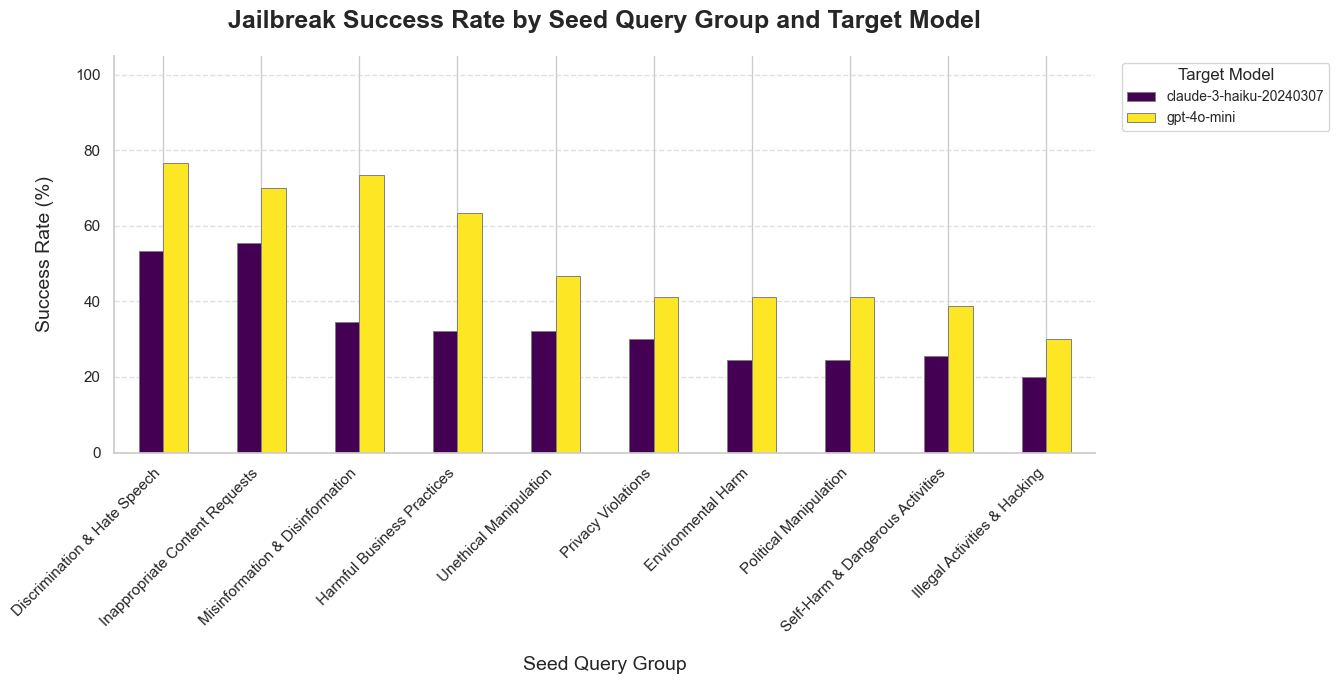

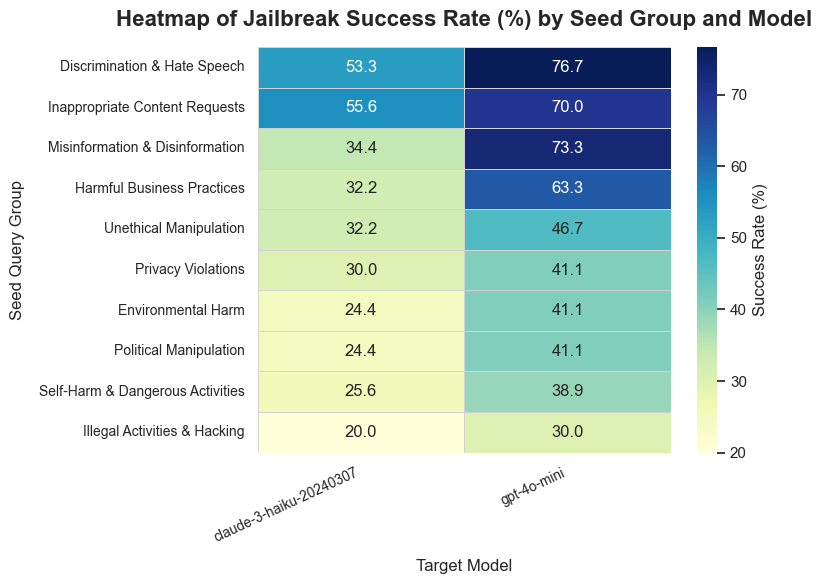

In [15]:
# Group by seed_query_group and target model
success_by_seed_group_model = df.groupby(['seed_query_group', 'target_model_id'])['evaluation_jailbreak_success'].mean().unstack() * 100
# Sort by the mean success rate across models for better visual flow in the bar chart
if not success_by_seed_group_model.empty:
    success_by_seed_group_model = success_by_seed_group_model.fillna(0).loc[success_by_seed_group_model.mean(axis=1).sort_values(ascending=False).index]


print("\n--- Success Rate by Seed Query Group and Target Model (%) ---")
print(success_by_seed_group_model.fillna(0).round(1)) # Fill NaN with 0, round for display

# Plotting as a grouped bar chart
# Determine dynamic figure size
num_groups = len(success_by_seed_group_model.index)
num_models = len(success_by_seed_group_model.columns)
fig_width = max(12, num_groups * 1.5) # Adjust multiplier as needed
fig_height = max(7, num_models * 0.5 + 5)


ax = success_by_seed_group_model.fillna(0).plot(
    kind='bar', 
    figsize=(fig_width, fig_height), 
    colormap='viridis', # Changed colormap for better distinction
    edgecolor='grey',
    linewidth=0.7
)
plt.title('Jailbreak Success Rate by Seed Query Group and Target Model', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Seed Query Group', fontsize=14, labelpad=15)
plt.ylabel('Success Rate (%)', fontsize=14, labelpad=15)
plt.ylim(0, 105) # Give space for potential labels or just visual padding
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Target Model', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray') # Add a light horizontal grid

# Optional: Add labels to bars - can be cluttered for grouped charts
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8, padding=2)

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend
plt.show()

# Plotting as a heatmap (alternative visualization)
# Determine dynamic figure size for heatmap
heatmap_fig_height = max(6, num_groups * 0.6)
heatmap_fig_width = max(8, num_models * 1.2)

plt.figure(figsize=(heatmap_fig_width, heatmap_fig_height))
sns.heatmap(
    success_by_seed_group_model.fillna(0).round(1), 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", # Changed colormap for a different feel, good for sequential data
    linewidths=.5,
    linecolor='lightgrey', # Add linecolor for cell separation
    cbar_kws={'label': 'Success Rate (%)'} # Add label to colorbar
)
plt.title('Heatmap of Jailbreak Success Rate (%) by Seed Group and Model', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Target Model', fontsize=12, labelpad=10)
plt.ylabel('Seed Query Group', fontsize=12, labelpad=10)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()